In [1]:
# !pip install pymysql sqlalchemy

In [2]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv(r'C:\Users\kaohs\Desktop\Ironhack 2024\Labs\lab-imbalanced-data\files_for_lab\customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
le = LabelEncoder()
df['customerID_encoder'] = le.fit_transform(df['customerID'])
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_encoder
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,5375
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,3962
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2564
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,5535
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,6511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,4853
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1525
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,3367
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,5934


**We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
df= df.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'], axis=1)
df

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_encoder
0,0,1,29.85,No,5375
1,0,34,56.95,No,3962
2,0,2,53.85,Yes,2564
3,0,45,42.30,No,5535
4,0,2,70.70,Yes,6511
...,...,...,...,...,...
7038,0,24,84.80,No,4853
7039,0,72,103.20,No,1525
7040,0,11,29.60,No,3367
7041,1,4,74.40,Yes,5934


In [7]:
df.isna().sum()

SeniorCitizen         0
tenure                0
MonthlyCharges        0
Churn                 0
customerID_encoder    0
dtype: int64

In [8]:
df.dtypes

SeniorCitizen           int64
tenure                  int64
MonthlyCharges        float64
Churn                  object
customerID_encoder      int32
dtype: object

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

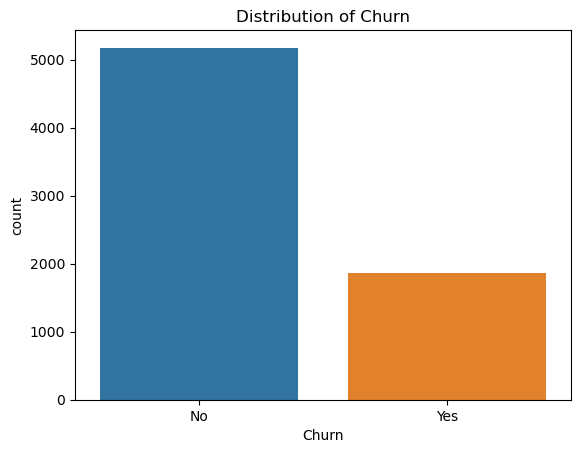

In [10]:
sns.countplot(x='Churn', data=df)


plt.title('Distribution of Churn')
plt.show()

C:\Users\kaohs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


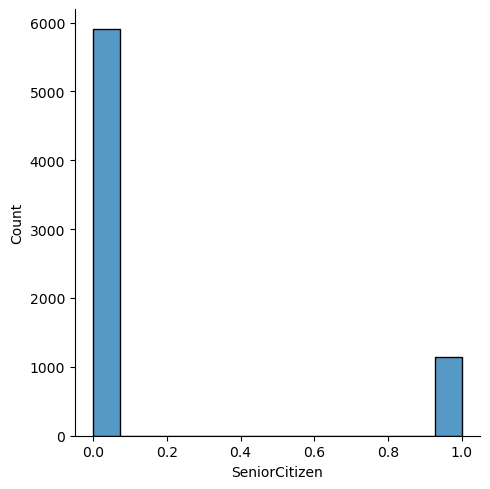

C:\Users\kaohs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


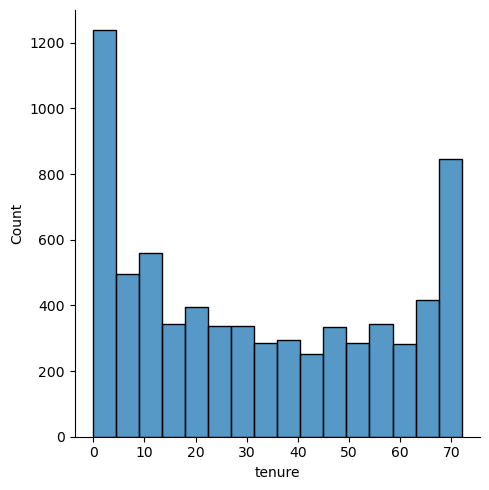

C:\Users\kaohs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


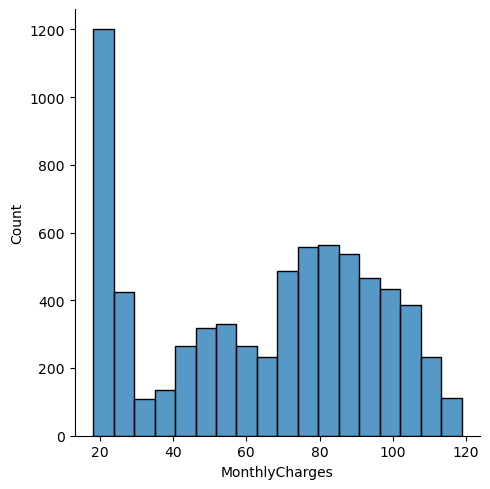

C:\Users\kaohs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


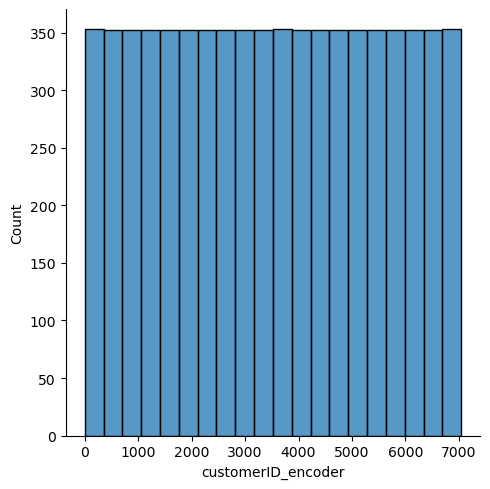

In [11]:
for col in df.select_dtypes(np.number):
    sns.displot(df[col])
    plt.show()

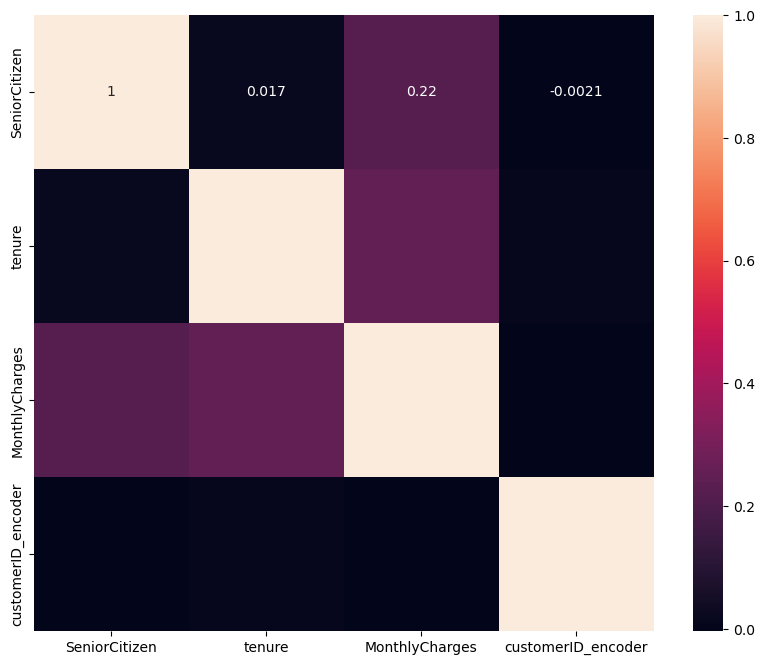

In [12]:
corr_matrix=df.drop(columns=["Churn"]).corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Benchmark

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report (y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.62      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



        The above 70% accuracy is due to the data imbalance which helps the model guess that the response iss more likely 'no' for churn.

In [14]:
#Trying to standardize the data for the model to work better 

scaler = StandardScaler()

X =df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.62      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [15]:
#The scaling did not help because we got the exact samme results. 

In [16]:
#Trying to balance the data to enable the model predict more accurately all values for Churn.
from imblearn.over_sampling import SMOTE

X =df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

Churn
No     4139
Yes    4139
Name: count, dtype: int64

In [17]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.72      0.79      1035
         Yes       0.48      0.71      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.71      0.68      1409
weighted avg       0.77      0.72      0.73      1409



In [18]:
#The results from the latest model are more reliable because if we are trying to understand which customers are prone to churning ,we will need the recall for "yes" to be as high as possible.This will enable the business to work on keeping those customeres.although we will need to regularly check the ones that are caught because the precision score is not very high. 

In [19]:
from imblearn.under_sampling import TomekLinks

X =df.drop('Churn', axis=1)
y = df['Churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

Churn
No     4578
Yes    1869
Name: count, dtype: int64

In [20]:
X =df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = tomek.fit_resample(X, y)

X_test = X.set_index('customerID_encoder').drop(labels=X_train['customerID_encoder'])
y_test = y.drop(labels=X_train['customerID_encoder'])

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train.set_index('customerID_encoder'), y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.73      0.64      0.68       440
         Yes       0.25      0.34      0.29       156

    accuracy                           0.56       596
   macro avg       0.49      0.49      0.49       596
weighted avg       0.61      0.56      0.58       596



In [21]:
#This model does not work well because when looking at the recall it is the worst out of the 3 different models we tested . Therefore, the most reliable model would be the one used after balancing the data with SMOTE.
